<a href="https://colab.research.google.com/github/aniketbhoy/SoC_2024/blob/main/FashionMNIST_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:01<00:00, 18901463.42it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 336749.61it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5477672.50it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13648721.23it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

In [5]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [7]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [8]:
X_train.shape

torch.Size([1, 28, 28])

In [9]:
x = X_train.view(1,1,28,28)

In [10]:
x = F.relu(conv1(x))

In [11]:
x.shape

torch.Size([1, 6, 26, 26])

In [12]:
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 6, 13, 13])

In [13]:
x = F.relu(conv2(x))
x.shape

torch.Size([1, 16, 11, 11])

In [14]:
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 5, 5])

#Model:
convlayer1 -> poolinglayer1 -> convlayer2 -> poolinglayer2 -> fc1 -> fc2 -> fc3

In [15]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    X = X.view(-1,5*5*16)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)

In [16]:
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training time: {total/60} minutes')

Epoch: 0  Batch: 600  Loss: 0.6266642808914185
Epoch: 0  Batch: 1200  Loss: 0.35176321864128113
Epoch: 0  Batch: 1800  Loss: 0.13981249928474426
Epoch: 0  Batch: 2400  Loss: 0.43956613540649414
Epoch: 0  Batch: 3000  Loss: 0.4174361824989319
Epoch: 0  Batch: 3600  Loss: 0.5050423741340637
Epoch: 0  Batch: 4200  Loss: 0.4322306215763092
Epoch: 0  Batch: 4800  Loss: 0.41033488512039185
Epoch: 0  Batch: 5400  Loss: 0.06023687869310379
Epoch: 0  Batch: 6000  Loss: 0.43920794129371643
Epoch: 1  Batch: 600  Loss: 0.2726040482521057
Epoch: 1  Batch: 1200  Loss: 0.38752150535583496
Epoch: 1  Batch: 1800  Loss: 0.6071909666061401
Epoch: 1  Batch: 2400  Loss: 0.6511020660400391
Epoch: 1  Batch: 3000  Loss: 0.18056049942970276
Epoch: 1  Batch: 3600  Loss: 0.20042219758033752
Epoch: 1  Batch: 4200  Loss: 0.12877795100212097
Epoch: 1  Batch: 4800  Loss: 0.1349291354417801
Epoch: 1  Batch: 5400  Loss: 0.3586387634277344
Epoch: 1  Batch: 6000  Loss: 0.2830290198326111
Epoch: 2  Batch: 600  Loss: 0.35

In [19]:
#Train accuracy with each epoch
for i in train_correct:
  print(i.item()/60000*100)

80.475
87.01666666666667
88.81166666666667
90.05
90.85666666666667
91.26666666666667
91.77
92.25999999999999
92.71666666666667
92.90833333333333


In [20]:
#Test accuracy with each epoch
for i in test_correct:
  print(i.item()/10000*100)

85.15
88.0
88.66000000000001
88.61
88.99000000000001
89.08
89.58
90.24
90.63
90.42


In [21]:
y_true = []
y_pred = []

with torch.no_grad():
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        y_true.extend(y_test.tolist())
        y_pred.extend(predicted.tolist())

cm = confusion_matrix(y_true, y_pred)
class_accuracy = (cm.diagonal()/cm.sum(axis=1))*100
class_labels = train_data.classes
for i, acc in enumerate(class_accuracy):
    print(f'Class {class_labels[i]}: Accuracy: {acc:.2f}')

Class T-shirt/top: Accuracy: 88.60
Class Trouser: Accuracy: 97.00
Class Pullover: Accuracy: 85.30
Class Dress: Accuracy: 89.20
Class Coat: Accuracy: 83.50
Class Sandal: Accuracy: 98.10
Class Shirt: Accuracy: 72.50
Class Sneaker: Accuracy: 96.00
Class Bag: Accuracy: 98.00
Class Ankle boot: Accuracy: 96.00


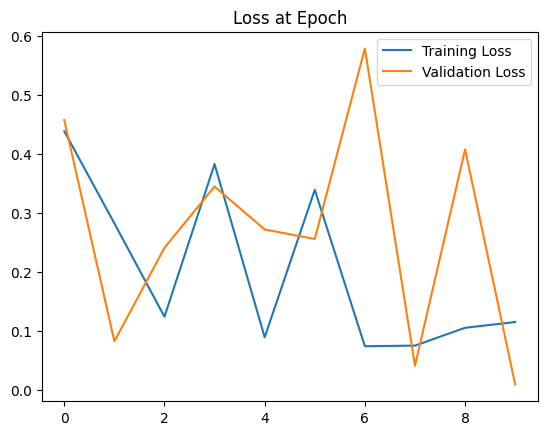

In [22]:
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

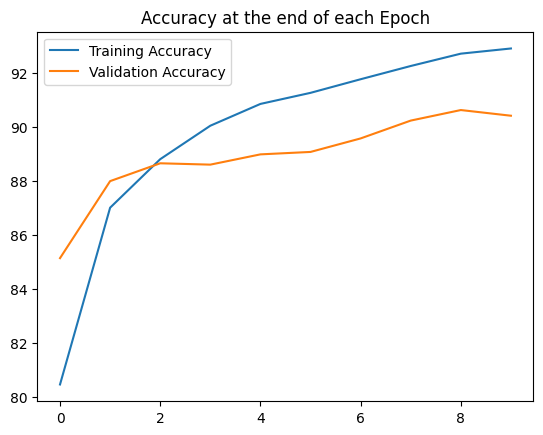

In [23]:
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

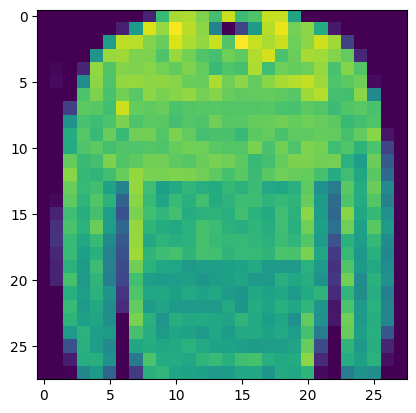

In [24]:
plt.imshow(test_data[20][0].reshape(28,28))

In [25]:
#Trouser is the second class
model.eval()
with torch.no_grad():
  prediction = model(test_data[20][0].view(1,1,28,28))

In [26]:
prediction

tensor([[-4.9637e+00, -2.3389e+01, -7.3442e-03, -1.4936e+01, -1.0143e+01,
         -2.4840e+01, -8.1624e+00, -2.3180e+01, -1.2121e+01, -2.7234e+01]])

In [27]:
prediction.argmax()

tensor(2)

#With dropout layer and weight decay

In [28]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16,120)
    self.drop = nn.Dropout(0.15)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    X = X.view(-1,5*5*16)
    X = F.relu(self.fc1(X))
    X = self.drop(X)
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)

In [29]:
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (drop): Dropout2d(p=0.15, inplace=False)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [30]:
criterion = nn.CrossEntropyLoss()
weight_decay = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)

In [31]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training time: {total/60} minutes')

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch: 0  Batch: 600  Loss: 0.8956686854362488
Epoch: 0  Batch: 1200  Loss: 0.4382217526435852
Epoch: 0  Batch: 1800  Loss: 0.15096436440944672
Epoch: 0  Batch: 2400  Loss: 0.42155686020851135
Epoch: 0  Batch: 3000  Loss: 0.4659806191921234
Epoch: 0  Batch: 3600  Loss: 0.5868070721626282
Epoch: 0  Batch: 4200  Loss: 0.5287185311317444
Epoch: 0  Batch: 4800  Loss: 0.48065632581710815
Epoch: 0  Batch: 5400  Loss: 0.10174909979104996
Epoch: 0  Batch: 6000  Loss: 0.38965079188346863
Epoch: 1  Batch: 600  Loss: 0.24661846458911896
Epoch: 1  Batch: 1200  Loss: 1.1009852886199951
Epoch: 1  Batch: 1800  Loss: 0.6603546738624573
Epoch: 1  Batch: 2400  Loss: 0.401135116815567
Epoch: 1  Batch: 3000  Loss: 0.5887269377708435
Epoch: 1  Batch: 3600  Loss: 0.271284282207489
Epoch: 1  Batch: 4200  Loss: 0.647002100944519
Epoch: 1  Batch: 4800  Loss: 0.6456838846206665
Epoch: 1  Batch: 5400  Loss: 0.4113314747810364
Epoch: 1  Batch: 6000  Loss: 0.336887925863266
Epoch: 2  Batch: 600  Loss: 0.3067777156

In [32]:
#Train accuracy with each epoch
for i in train_correct:
  print(i.item()/60000*100)

79.04166666666667
85.96833333333333
88.005
88.82166666666666
89.47500000000001
89.97333333333334
90.305
90.43833333333333
90.90666666666667
90.91


In [33]:
#Test accuracy with each epoch
for i in test_correct:
  print(i.item()/10000*100)

84.21
86.18
87.7
89.01
88.05
88.53999999999999
89.25
88.86
89.16
87.9


In [34]:
y_true = []
y_pred = []

with torch.no_grad():
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        y_true.extend(y_test.tolist())
        y_pred.extend(predicted.tolist())

cm = confusion_matrix(y_true, y_pred)
class_accuracy = (cm.diagonal()/cm.sum(axis=1))*100
class_labels = train_data.classes
for i, accuracy in enumerate(class_accuracy):
    print(f'Class {class_labels[i]}, Accuracy: {accuracy:.2f}')

Class T-shirt/top, Accuracy: 67.00
Class Trouser, Accuracy: 97.60
Class Pullover, Accuracy: 81.20
Class Dress, Accuracy: 91.00
Class Coat, Accuracy: 84.50
Class Sandal, Accuracy: 95.40
Class Shirt, Accuracy: 77.90
Class Sneaker, Accuracy: 94.40
Class Bag, Accuracy: 96.20
Class Ankle boot, Accuracy: 96.90


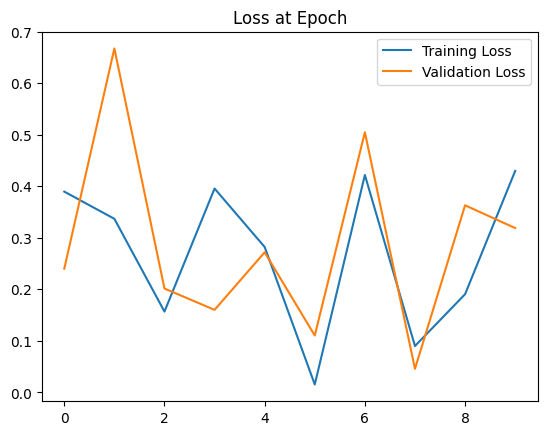

In [35]:
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

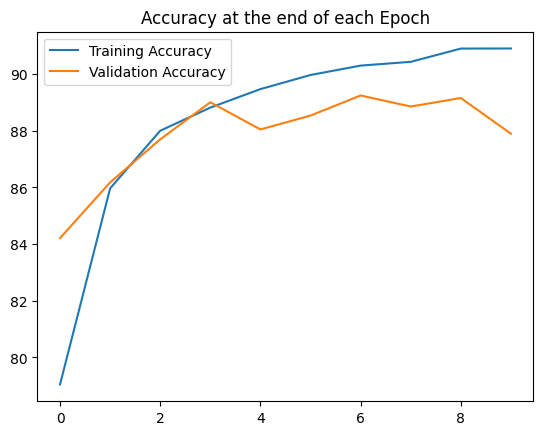

In [36]:
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()